<a href="https://colab.research.google.com/github/Ali-Ahmadi/Digital-Image-Processing/blob/master/05_Spatial_Filtering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Filtering - Spatial Filtering
![convolution](https://static1.squarespace.com/static/5a8dbb09bff2006c33266320/t/5baff4441905f4c995f31810/1538257990895/)

In this section, you will see how to define different kernels and apply them on digital images using OpenCV in python.

You can find the complete details and information about the sytax and codes in OpenCV [docs center](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#void%20boxFilter(InputArray%20src,%20OutputArray%20dst,%20int%20ddepth,%20Size%20ksize,%20Point%20anchor,%20bool%20normalize,%20int%20borderType).

Import required packages for image filtering.

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

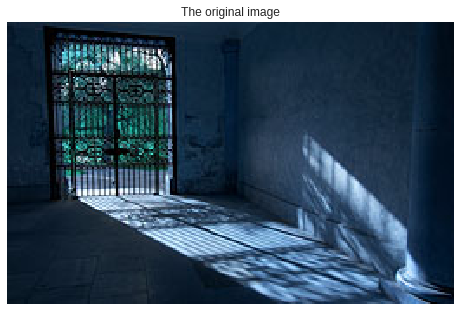

In [11]:
ref = cv2.imread('hist_lowkey.jpg')
plt.imshow(ref), plt.grid(False)

# while learning how to perform spatial filtering,
# you can also note how to apply different python commands.
plt.title('The original image')
plt.xticks([])
plt.yticks([])
plt.show()

There are two key factors in applying a filter on an image in digital image processing; __1)__ the kernal type (and size), and __2)__ the padding method.

There are different methods for defining the kernel and introducing the padding method in OpenCV. Unlike MATLAB that the kernel parameters are defined very easily, in OpenCV you have more control over the parameters and should take a longer way to reach the goal.

Below, you see how to define a very simple averaging kernel and apply it on your images.

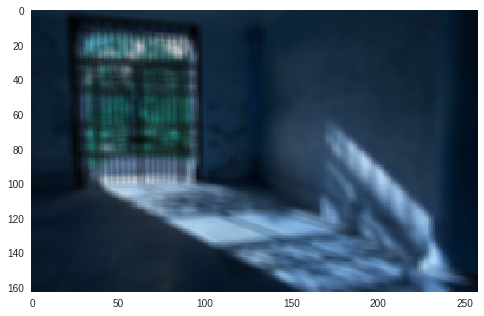

In [4]:
# defining a kernel using numpy.
kernel = np.ones((5,5),np.float32)/25

# Convolves an image with the kernel.
# -1 means that the center of the kernel is located on the center pixel.
dst = cv2.filter2D(low,-1,kernel)

plt.imshow(dst)
plt.grid(False)

plt.show()

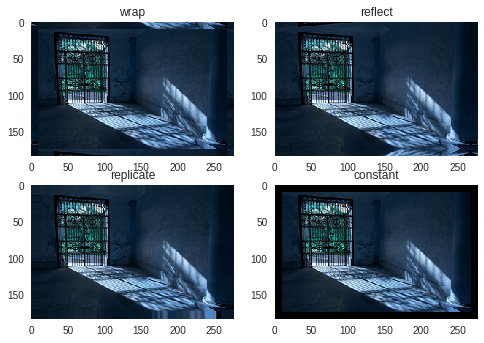

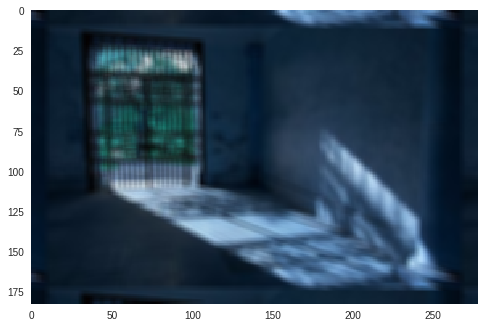

In [5]:
img2 = cv2.copyMakeBorder(low, 10, 10, 10, 10, cv2.BORDER_WRAP)
img3 = cv2.copyMakeBorder(low, 10, 10, 10, 10, cv2.BORDER_REFLECT)
img4 = cv2.copyMakeBorder(low, 10, 10, 10, 10, cv2.BORDER_REPLICATE)
img5 = cv2.copyMakeBorder(low, 10, 10, 10, 10, cv2.BORDER_CONSTANT, 10)

plt.subplot(221)
plt.imshow(img2)
plt.grid(False)
plt.title('wrap')

plt.subplot(222)
plt.imshow(img3)
plt.grid(False)
plt.title('reflect')

plt.subplot(223)
plt.imshow(img4)
plt.grid(False)
plt.title('replicate')

plt.subplot(224)
plt.imshow(img5)
plt.grid(False)
plt.title('constant')

plt.show()

dst2 = cv2.filter2D(img2,-1,kernel)

plt.imshow(dst2)
plt.grid(False)

plt.show()